In [63]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

#load dataset
import pandas as pd
print("pandas version: {}". format(pd.__version__))
import numpy as np
print("NumPy version: {}". format(np.__version__))

#Visualisation
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
print("Seaborn version: {}". format(sns.__version__))

#EDA
import pandas_profiling as pp
print("pandas_profiling version: {}". format(pp.__version__))

import random

# %matplotlib inline
# mpl.style.use('ggplot')
# sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8

# https://www.kaggle.com/START-UMD/gtd 

Python version: 3.8.5 (default, Jul 27 2020, 08:42:51) 
[GCC 10.1.0]
pandas version: 1.0.5
NumPy version: 1.19.0
Seaborn version: 0.10.1
pandas_profiling version: 2.8.0


In [97]:
# data = pd.read_excel("./datasets/globalterrorismdb_0919dist.xlsx")
data = pd.read_csv("./datasets/globalterrorismcsv.csv")
data.head()

/home/ryant/Projects/Data-Mining-3804/Data-Mining-ENV/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(191464, 135)

# Data Exploration
#### Almost 200,000 data entries accross 135 columns
#### Explore columns relative to asked questions

In [76]:
for i in range(135):
    print(i, ":", data.columns[i])

0 : eventid
1 : iyear
2 : imonth
3 : iday
4 : approxdate
5 : extended
6 : resolution
7 : country
8 : country_txt
9 : region
10 : region_txt
11 : provstate
12 : city
13 : latitude
14 : longitude
15 : specificity
16 : vicinity
17 : location
18 : summary
19 : crit1
20 : crit2
21 : crit3
22 : doubtterr
23 : alternative
24 : alternative_txt
25 : multiple
26 : success
27 : suicide
28 : attacktype1
29 : attacktype1_txt
30 : attacktype2
31 : attacktype2_txt
32 : attacktype3
33 : attacktype3_txt
34 : targtype1
35 : targtype1_txt
36 : targsubtype1
37 : targsubtype1_txt
38 : corp1
39 : target1
40 : natlty1
41 : natlty1_txt
42 : targtype2
43 : targtype2_txt
44 : targsubtype2
45 : targsubtype2_txt
46 : corp2
47 : target2
48 : natlty2
49 : natlty2_txt
50 : targtype3
51 : targtype3_txt
52 : targsubtype3
53 : targsubtype3_txt
54 : corp3
55 : target3
56 : natlty3
57 : natlty3_txt
58 : gname
59 : gsubname
60 : gname2
61 : gsubname2
62 : gname3
63 : gsubname3
64 : motive
65 : guncertain1
66 : guncertain2

## Quick Potentially useful Attribute overview:

Many attributes have two columns associated one for the text value and another for an indexed version of that value.
eg. 7: country & 8: country_txt, country_txt contains (Australia), country countains an indexed value for it (5).

### Time: 1-6
#### Attributes relating to date and length of attack
0 : eventid - Unique identifier, combines date and count on that date  
1 : iyear  
2 : imonth  
3 : iday  
5 : extended - Does the event extend over a 24hr period  
6 : resolution - If extended the end date  

### Location: 7-17
#### Attributes relating to location and area of attack
7,8 : country & country_txt  
9,10 : region & region_txt - eg. South Asia, Middle East & North Africa  
11, 12 : provstate & city - Province and city  
13-15 : latitude & longitude  

### Classification: 18-27
#### Attributes relating to classification of attack
18 : summary - Text summary  
19 : crit1 - Binary, Profit motivated - politics, economic, religious  
20 : crit2 - Binary, Coercion, intimidation, gain audience  
21 : crit3 - Binary, Targets non-combatants, breaks geneva conventions  
22 : doubtterr - Binary, is there doubt about if it is an act of terrorism  
23,24 : alternative - If there is doubt potential other reason for incident  
25 : multiple - Binary, Part of a multi incident event

### Attack: 26-33
#### Attributes relating to the type and outcome of attack
26 : success - Binary, Was the attack successful  
27 : suicide - Binary, Evidence perpetrator did not intend to escape  
28-33 : attacktype# 1-3 - Method or tactics of attack, 2&3 used if sequence of events  

### Target: 34-57
#### Attributes relating to target of attacks
34,35 : targtype - 22 catagories, general type of target (Business, Police)  
36,37 : targsubtype - 100+ subcatagories, specific target (Restaurant, Hotel)  
40,41 : natlty - catagorical, Nationality of target attacked  
42-57 : targtype# 2&3 - Additional targets  

### Perpetrator: 58-80
#### Attributes relating to perpretrators of attack
58 : gname - Text, Name of group  
59 : gsubname  
60-63 : gname# 2&3  
65,66,67 : guncertain# 1,2,3 - Gname based on speculation or dubious claims  
68 : individaul - Binary, Carried out by individual  
69 : nperps - Numerical, Number of terrorists participating  
70 : nperpcap - Numerical, Number of terrosists captured  

### Weapon: 81-97
#### Four weapon types recorded  
81,82 : weaptype - 13 weapon catagoried  
83,84 : weapsubtype - More specific weapon type  
85-96 : weaptype# 2-4  

### Casualties & Consequences: 98-124
#### Fatalities and Damages
98 : nkill - Numerical, number of fatalities  
100 : nkillter - Numerical, number of perpetrator fatalities  
101 : nwound - Numerical, number of non-fatal injuries  
103 : nwoundte - Numerical, number of non-fatal perpetrator injuries  
104 : property - Binary, evidence of property damage  
105,106 : propextent - 4 catagories, extend of property damage  
109 : ishostkid - Binary, where hostages taken  
110 : nhostkid - Numerical, Number of hostages taken  
116 : ransom - Binary, Was a ransom demanded  
119 : ransompaid - Numerical, how much ransom was paid  
122,123 : hostkidoutcome - Categorical, outcome of hostage situation  
124 : nreleased - Numerical, number of hostages released  


## Doubtterr:
One stand out variable is doubtterr a binary attribute that has a value of 0 if the event is not a clear sign of terrorism.  All events with a value of 1 can be removed from the dataset as they do not fall under terrorism.

In older data this wasnt always recorded and a value of '-9' was entered, we will assume all these cases are terrorism and set their value to '0'.

In [98]:
print(data['doubtterr'].value_counts())

data.loc[data.doubtterr == -9,'doubtterr'] = 0
data = data.loc[data.doubtterr == 0]

print(data['doubtterr'].value_counts())
print(data.shape)

 0    146619
 1     31060
-9     13785
Name: doubtterr, dtype: int64
0    160404
Name: doubtterr, dtype: int64
(160404, 135)


## Attribute Selection:

Many columns are repeated values eg. country and country_txt, all txt attributes are dropped.

Sparsely populated attributes are also removed, eg. weaptpype4 as not many attacks included that many different weapons.

36 Attributes are selected below

In [99]:
attributes = ['eventid', 'iyear', 'imonth', 'iday', 'extended',
             'country', 'region',
             'success', 'suicide', 'attacktype1', 'attacktype2',
             'targtype1', 'targtype2', 'targsubtype1', 'targsubtype2',
             'natlty1', 'natlty2',
             'gname', 'individual', 'nperps',
             'weaptype1', 'weaptype2', 'weaptype3', 'weapsubtype1', 'weapsubtype2', 'weapsubtype3',
             'nkill', 'nkillter', 'nwound', 'nwoundte', 'property', 'propextent']
#data = data[attributes]
data.shape

(160404, 135)

# Data Visualisation

### iyear:
Ranging from 1970 - 2018 without 1993 due to errors in collection, databases that reconstruct 1993 are available but we will not be integrating at this stage.  A sharp increase in attacks can be seen in 2010's.
### imonth:
Attacks are distributed fairly evenly through out the months of the year.  If the exact month is unknown "0" is recorded pre 2011. Only 20 of these values exist in the database.
### iday:
The 1st and 14th are the most populated days of the month for attacks, the 30th and 31st are less popular as not everymonth has them.  If the exact date of the attack is unknown "0" is recorded, however for events after 2011 the date was selected from the midpoint of the range of possible dates.

In [91]:
data[["iyear", "imonth", "iday"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iyear,160404.0,2003.305061,13.295013,1970.0,1991.0,2009.0,2014.0,2018.0
imonth,160404.0,6.468741,3.391907,0.0,4.0,6.0,9.0,12.0
iday,160404.0,15.509794,8.806582,0.0,8.0,15.0,23.0,31.0


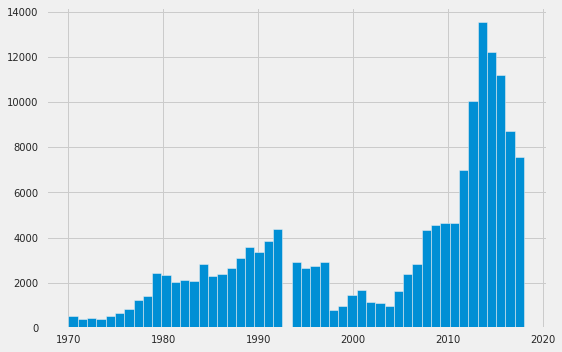

In [92]:
plt.hist = data['iyear'].hist(bins=49)
plt.show()

In [101]:
def rand_month():
    return random.randrange(12)

data.loc[data['imonth'] == 0,'imonth'] = rand_month()

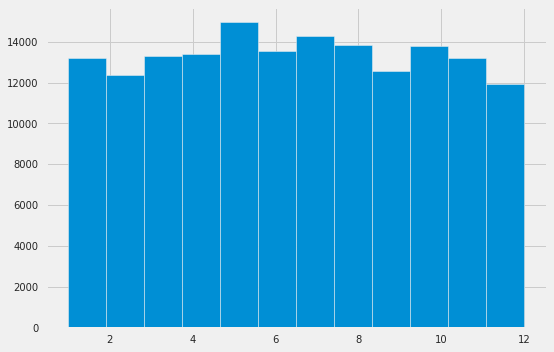

In [102]:
plt.hist = data['imonth'].hist(bins=12)
plt.show()

In [103]:
def rand_day():
    return random.randrange(28)

data.loc[data['iday'] == 0,'iday'] = rand_day()

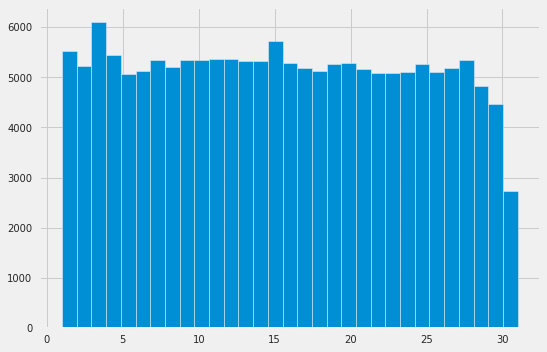

In [104]:
plt.hist = data['iday'].hist(bins=31)
plt.show()

## extended:
A binary value showing if the incident took longer than 24 hrs to occur.


In [71]:
data['extended'].value_counts()

0    182374
1      9090
Name: extended, dtype: int64

## Country

In [128]:
data['country_txt'].value_counts()[:10]

Iraq              26057
Pakistan          14847
Afghanistan       14509
India             12853
Colombia           8515
Philippines        7509
Peru               6108
United Kingdom     5335
El Salvador        5320
Somalia            4674
Name: country_txt, dtype: int64

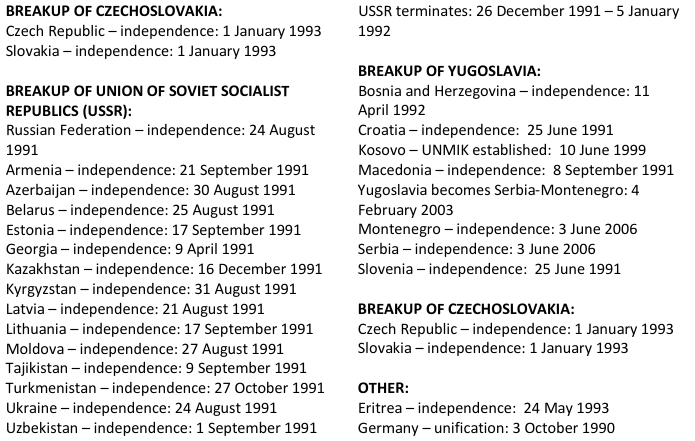

In [129]:
data['region_txt'].value_counts()

Middle East & North Africa     53110
South Asia                     48266
Sub-Saharan Africa             19752
South America                  19292
Western Europe                 16843
Southeast Asia                 13363
Central America & Caribbean    10359
Eastern Europe                  5217
North America                   3579
East Asia                        808
Central Asia                     571
Australasia & Oceania            304
Name: region_txt, dtype: int64

/home/ryant/Projects/Data-Mining-3804/Data-Mining-ENV/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


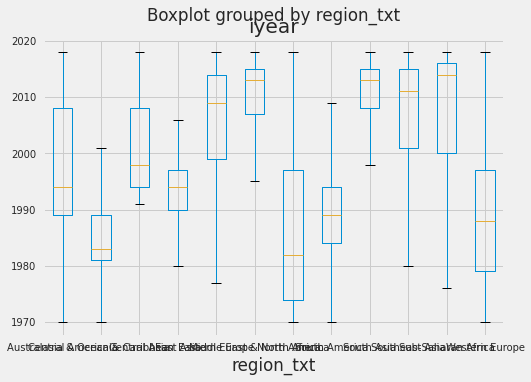

In [106]:
plt.boxplot = data.boxplot(column='iyear', by = 'region_txt', showfliers=False)
plt.show()

City and Province variable could be used if we want to break down specific countries

# Crit1, 2, 3

In [87]:
data['crit1'].value_counts()

1    160360
0        44
Name: crit1, dtype: int64

In [107]:
data['crit2'].value_counts()

1    160399
0         5
Name: crit2, dtype: int64

In [108]:
data['crit3'].value_counts()

1    160383
0        21
Name: crit3, dtype: int64

# Success

In [109]:
data['success'].value_counts()

1    141827
0     18577
Name: success, dtype: int64

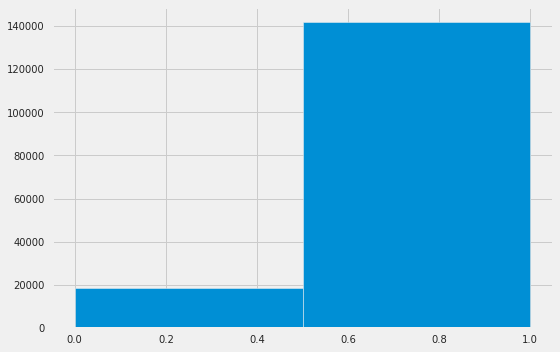

In [110]:
plt.hist = data['success'].hist(bins=2)
plt.show()

In [111]:
data['suicide'].value_counts()

0    154755
1      5649
Name: suicide, dtype: int64

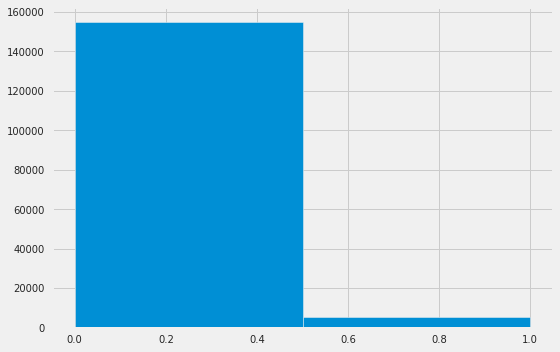

In [114]:
plt.hist = data['suicide'].hist(bins = 2)
plt.show()

# Attack Type

In [131]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      91842
Armed Assault                          45251
Assassination                          20117
Hostage Taking (Kidnapping)            12138
Facility/Infrastructure Attack         11017
Unknown                                 8267
Unarmed Assault                         1096
Hostage Taking (Barricade Incident)     1048
Hijacking                                688
Name: attacktype1_txt, dtype: int64

In [ ]:
data['attacktype1'].sort_values().plot(kind='bar')
plt.show()

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f8497a48940>
Traceback (most recent call last):
  File "/home/ryant/Projects/Data-Mining-3804/Data-Mining-ENV/lib/python3.8/site-packages/matplotlib/transforms.py", line 178, in <lambda>
    target=child._parents: target.pop(sid))
KeyboardInterrupt: 


In [133]:
data['attacktype2_txt'].value_counts()

Armed Assault                          3753
Facility/Infrastructure Attack         2007
Bombing/Explosion                       530
Hostage Taking (Kidnapping)             488
Assassination                           162
Hostage Taking (Barricade Incident)      37
Unarmed Assault                          33
Hijacking                                10
Unknown                                   3
Name: attacktype2_txt, dtype: int64

In [134]:
data['success'].value_counts()

1    169795
0     21669
Name: success, dtype: int64

In [136]:
data['suicide'].value_counts()
# 1 when perpetrator did not expect to survive

0    184453
1      7011
Name: suicide, dtype: int64

In [135]:
data['weaptype1_txt'].value_counts()

Explosives                                                                     96407
Firearms                                                                       61885
Unknown                                                                        16621
Incendiary                                                                     11791
Melee                                                                           3905
Chemical                                                                         336
Sabotage Equipment                                                               158
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      153
Other                                                                            127
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [137]:
data['weapsubtype1_txt'].value_counts()

Unknown Explosive Type                       46432
Unknown Gun Type                             35986
Automatic or Semi-Automatic Rifle            17670
Projectile (rockets, mortars, RPGs, etc.)    10461
Vehicle                                      10220
Other Explosive Type                          7515
Handgun                                       6886
Grenade                                       5496
Landmine                                      4636
Arson/Fire                                    4631
Suicide (carried bodily by human being)       3484
Remote Trigger                                2868
Knife or Other Sharp Object                   2765
Sticky Bomb                                   1744
Molotov Cocktail/Petrol Bomb                  1362
Rifle/Shotgun (non-automatic)                 1245
Dynamite/TNT                                  1240
Gasoline or Alcohol                            888
Time Fuse                                      810
Pipe Bomb                      

In [138]:
data['weaptype2_txt'].value_counts()

Firearms                                                                       5675
Explosives                                                                     3017
Incendiary                                                                     2590
Melee                                                                          1630
Unknown                                                                         934
Other                                                                           136
Sabotage Equipment                                                               65
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      60
Chemical                                                                         56
Fake Weapons                                                                     27
Biological                                                                        2
Name: weaptype2_txt, dtype: int64

In [139]:
data['weaptype3_txt'].value_counts()

Firearms                                                                       876
Melee                                                                          433
Incendiary                                                                     365
Explosives                                                                     200
Unknown                                                                         59
Other                                                                           49
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     18
Sabotage Equipment                                                              14
Fake Weapons                                                                    11
Chemical                                                                         9
Name: weaptype3_txt, dtype: int64

In [141]:
data['targtype1_txt'].value_counts()

Private Citizens & Property       46283
Military                          29978
Police                            26023
Government (General)              22274
Business                          21277
Transportation                     6929
Unknown                            6449
Utilities                          6158
Religious Figures/Institutions     4693
Educational Institution            4500
Government (Diplomatic)            3664
Terrorists/Non-State Militia       3207
Journalists & Media                3072
Violent Political Party            1959
Airports & Aircraft                1363
Telecommunication                  1052
NGO                                1020
Tourists                            449
Maritime                            371
Food or Water Supply                330
Abortion Related                    265
Other                               148
Name: targtype1_txt, dtype: int64

In [142]:
data['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                               12233
Police Security Forces/Officers                            11726
Military Unit/Patrol/Convoy                                 8599
Military Personnel (soldiers, troops, officers, forces)     8584
Village/City/Town/Suburb                                    7150
                                                           ...  
Multiple Telecommunication Targets                            31
Fire Fighter/Truck                                            29
Oil Tanker                                                    23
Personnel                                                     19
Internet Infrastructure                                       12
Name: targsubtype1_txt, Length: 112, dtype: int64

In [143]:
data['natlty1_txt'].value_counts()

Iraq                              25522
Pakistan                          14377
India                             13002
Afghanistan                       12567
Colombia                           8125
                                  ...  
Tuvalu                                1
Marshall Islands                      1
Western Sahara                        1
St. Lucia                             1
People's Republic of the Congo        1
Name: natlty1_txt, Length: 215, dtype: int64

In [145]:
data['gname'].value_counts()

Unknown                                        86261
Taliban                                         8727
Islamic State of Iraq and the Levant (ISIL)     6385
Shining Path (SL)                               4562
Al-Shabaab                                      3774
                                               ...  
Jihadi Movement of the Sunna People of Iran        1
Face to Face (Face-a-Face)                         1
French Basque Nationalists                         1
Sabaot Tribe                                       1
Extremist Nat'list Group                           1
Name: gname, Length: 3617, dtype: int64

In [146]:
data['gsubname'].value_counts()

Militants                                              480
People's Liberation Forces (FPL)                       427
Rebels                                                 163
Diyala Province of the Islamic State                   141
Baghdad Province of the Islamic State                  133
                                                      ... 
Uganda People's Liberation Army                          1
Jose Ignacio Mora Front                                  1
Yakutumba Mayi Mayi                                      1
Youth Brigade                                            1
People's Committee against Police Atrocities (PCPA)      1
Name: gsubname, Length: 1257, dtype: int64

In [147]:
data['gname2'].value_counts()

Khorasan Chapter of the Islamic State         63
Taliban                                       59
Al-Nusrah Front                               57
Lashkar-e-Taiba (LeT)                         56
National Liberation Army of Colombia (ELN)    52
                                              ..
Al-Shabaab al-Mu'minin                         1
Asa'ib Ahl al-Haqq                             1
Ahfad al-Sahaba-Aknaf Bayt al-Maqdis           1
Patriotic Arab Democratic Movement             1
Armed Struggle Organization                    1
Name: gname2, Length: 453, dtype: int64

In [148]:
data['individual'].value_counts()
# Only 700 done by individuals

0    190792
1       672
Name: individual, dtype: int64

In [149]:
data['nperps'].value_counts()

-99.0     90276
 1.0       9026
 2.0       6426
 3.0       2985
 4.0       2325
          ...  
 52.0         1
 750.0        1
 290.0        1
 68.0         1
 82.0         1
Name: nperps, Length: 114, dtype: int64

In [150]:
data['nkill'].value_counts()

0.0      92328
1.0      38587
2.0      14990
3.0       8193
4.0       5297
         ...  
315.0        1
212.0        1
184.0        1
163.0        1
280.0        1
Name: nkill, Length: 207, dtype: int64

In [151]:
data['nkillter'].value_counts()

0.0      109577
1.0        7052
2.0        2131
3.0        1262
4.0         795
          ...  
92.0          1
140.0         1
136.0         1
90.0          1
301.0         1
Name: nkillter, Length: 99, dtype: int64

In [152]:
data['nwound'].value_counts()

0.0      107978
1.0       17148
2.0       10987
3.0        7872
4.0        5201
          ...  
319.0         1
154.0         1
163.0         1
491.0         1
184.0         1
Name: nwound, Length: 240, dtype: int64

In [153]:
data['nwoundte'].value_counts()

0.0      118734
1.0         998
2.0         465
3.0         326
4.0         211
5.0         135
6.0         112
7.0          90
10.0         74
8.0          68
9.0          53
11.0         40
15.0         39
13.0         36
12.0         33
20.0         26
14.0         18
16.0         16
24.0         15
17.0         13
30.0         10
18.0          9
25.0          7
40.0          6
23.0          6
19.0          6
22.0          5
21.0          5
50.0          4
60.0          4
33.0          3
35.0          3
26.0          3
100.0         3
27.0          2
51.0          2
32.0          2
31.0          2
49.0          1
65.0          1
41.0          1
62.0          1
53.0          1
28.0          1
101.0         1
38.0          1
150.0         1
200.0         1
Name: nwoundte, dtype: int64

In [154]:
data['ishostkid'].value_counts()

 0.0    176243
 1.0     14626
-9.0       417
Name: ishostkid, dtype: int64

In [155]:
data['nhostkid'].value_counts()

 1.0       5938
 2.0       2000
-99.0      1316
 3.0       1139
 4.0        790
           ... 
 800.0        1
 146.0        1
 1686.0       1
 175.0        1
 79.0         1
Name: nhostkid, Length: 210, dtype: int64